<a href="https://colab.research.google.com/github/anjanasa13/Temperature-change-forecast/blob/main/Temperature_forecasting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The FAOSTAT Temperature Change sector provides data on average surface temperature variations per country, updated annually. The current dataset spans from 1961 to 2019 and includes monthly, seasonal, and annual temperature anomalies, indicating changes relative to a baseline climatology from 1951 to 1980. Additionally, it offers the standard deviation of temperature changes based on this baseline methodology. The information is sourced from the publicly accessible GISTEMP dataset, distributed by NASA's Goddard Institute for Space Studies (NASA-GISS).

**Forecasting Temperature Change in India: A Comparative Study of SARIMA and LSTM Models**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Environment_Temperature_change_E_All_Data_NOFLAG.csv to Environment_Temperature_change_E_All_Data_NOFLAG.csv
Saving FAOSTAT_data_1-10-2022.csv to FAOSTAT_data_1-10-2022.csv
Saving FAOSTAT_data_11-24-2020.csv to FAOSTAT_data_11-24-2020.csv


In [ ]:
data=pd.read_csv("/content/Environment_Temperature_change_E_All_Data_NOFLAG.csv",encoding='cp1252')

In [ ]:
data.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


The function basic_eda provides a good overview of the dataset. It includes the following operations:

1. Printing the top 5 records.
2. Printing information about the dataset.
3. Printing descriptive statistics of the dataset.
4. Listing columns in the dataset.
5. Counting null values in each column.
6. Printing the shape of the dataset.


In [ ]:
#basic eda operations
def basic_eda(df):
    print("-------------------------------TOP 5 RECORDS-----------------------------")
    print(df.head())
    print("-------------------------------INFO--------------------------------------")
    print(df.info())
    print("-------------------------------Describe Dataset----------------------------------")
    print(df.describe())
    print("-------------------------------Columns of Dataset-----------------------------------")
    print(df.columns)
    print("----------------------------NULL values----------------------------------")
    print(df.isna().sum())
    print("--------------------------Shape Of Data---------------------------------")
    print(df.shape)


In [ ]:
basic_eda(data)


-------------------------------TOP 5 RECORDS-----------------------------
   Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002  February          6078   
4          2  Afghanistan         7003     March          7271   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change   °C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation   °C  1.950  1.950  1.950  ...  1.950  1.950  1.950   
2  Temperature change   °C -1.743  2.465  3.919  ...  1.212  0.321 -3.201   
3  Standard Deviation   °C  2.597  2.597  2.597  ...  2.597  2.597  2.597   
4  Temperature change   °C  0.516  1.336  0.403  ...  3.390  0.748 -0.527   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.7

In [ ]:
# Select the dataframe subset without standard deviation values
data = data.loc[data.Element == 'Temperature change']

# Delete unnecessary columns
data.drop(columns=['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], inplace=True)

# Remove 'Y' from year's labels
data.rename(columns={x:x[1:] for x in data.columns if 'Y' in x}, inplace=True)

<ipython-input-11-bf1b41633bff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], inplace=True)
<ipython-input-11-bf1b41633bff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={x:x[1:] for x in data.columns if 'Y' in x}, inplace=True)


 We are processing the DataFrame to subset it, remove unnecessary columns, and modify column labels.
 The code targets columns containing standard deviation values, removing unnecessary columns, and cleaning up year labels.

In [ ]:
data.head()

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,0.389,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,Afghanistan,February,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,-2.055,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,Afghanistan,March,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,0.496,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,Afghanistan,April,-1.709,0.117,0.919,-0.533,-1.816,-1.192,-1.496,-0.590,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,Afghanistan,May,1.412,-0.092,-0.690,-0.160,-0.190,-0.192,-1.307,-1.841,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [ ]:
basic_eda(data)

-------------------------------TOP 5 RECORDS-----------------------------
          Area    Months   1961   1962   1963   1964   1965   1966   1967  \
0  Afghanistan   January  0.777  0.062  2.744 -5.232  1.868  3.629 -1.432   
2  Afghanistan  February -1.743  2.465  3.919 -0.202 -0.096  3.397  0.296   
4  Afghanistan     March  0.516  1.336  0.403  1.659 -0.909 -0.069 -0.759   
6  Afghanistan     April -1.709  0.117  0.919 -0.533 -1.816 -1.192 -1.496   
8  Afghanistan       May  1.412 -0.092 -0.690 -0.160 -0.190 -0.192 -1.307   

    1968  ...   2010   2011   2012   2013   2014   2015   2016   2017   2018  \
0  0.389  ...  3.601  1.179 -0.583  1.233  1.755  1.943  3.416  1.201  1.996   
2 -2.055  ...  1.212  0.321 -3.201  1.494 -3.187  2.699  2.251 -0.323  2.705   
4  0.496  ...  3.390  0.748 -0.527  2.246 -0.076 -0.497  2.296  0.834  4.418   
6 -0.590  ...  2.591  1.712  1.417 -0.052  0.585  1.589  0.980  1.252  1.442   
8 -1.841  ...  1.419  3.643  0.909  1.201  0.959  1.862  3.246 

In [ ]:
#display unique countries
data['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

In [ ]:
data['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

In [ ]:
#temperature change for india
country = 'India'

# Filter data for India
df_country = data[data['Area'] == country]
df_country.shape

(17, 61)

In [ ]:
df_country

,Area,Months,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3502,India,January,0.536,-1.289,-0.395,-0.528,0.775,0.495,-0.335,-0.646,...,0.209,-0.435,-0.252,0.009,0.190,-0.073,1.100,0.786,0.527,0.122
3504,India,February,-1.413,-0.380,0.669,-0.057,-0.272,1.284,0.716,-1.117,...,0.982,0.354,0.023,0.496,-0.459,0.970,1.777,1.286,1.290,0.392
3506,India,March,0.499,-0.569,-0.357,0.945,-0.860,-0.073,-1.115,-0.554,...,2.192,0.570,0.269,0.560,-0.361,-0.186,1.607,0.592,1.395,0.141
3508,India,April,0.026,-0.223,-0.903,0.570,-1.165,-0.019,-0.775,-0.932,...,1.990,-0.491,0.203,0.085,0.261,-0.505,1.670,1.198,0.654,1.034
3510,India,May,-0.144,-0.370,-0.558,-0.151,-0.430,0.116,-0.078,-0.539,...,1.052,0.253,0.650,0.775,-0.224,0.640,0.581,0.842,0.610,0.843
3512,India,June,-0.589,-0.049,-0.169,0.098,0.571,-0.040,0.299,-0.024,...,0.810,-0.427,1.105,-0.610,1.424,0.040,0.663,0.173,0.429,1.577
3514,India,July,-0.293,0.180,0.501,-0.297,0.031,0.805,0.108,0.018,...,0.558,0.442,0.666,-0.014,0.935,0.844,0.275,0.363,0.428,0.954
3516,India,August,0.065,-0.127,0.053,-0.038,0.075,0.233,-0.168,0.092,...,0.642,0.349,0.317,0.166,0.833,0.903,0.720,0.838,0.460,0.751
3518,India,September,-0.348,-0.384,0.134,-0.138,-0.035,0.028,-0.254,0.605,...,0.301,0.287,0.324,0.778,0.385,1.255,0.555,1.023,0.519,0.445
3520,India,October,-0.780,-0.852,0.133,0.050,0.440,0.204,-0.334,-0.315,...,0.916,0.707,0.105,0.391,0.696,1.368,0.816,1.260,0.803,0.267


In [ ]:
columns_ignore = ['Dec–Jan–Feb', 'Jun–Jul–Aug','Mar–Apr–May','Meteorological year','Sep–Oct–Nov']
df_country = df_country[~df_country['Months'].isin(columns_ignore)]
print(df_country)

       Area     Months   1961   1962   1963   1964   1965   1966   1967  \
3502  India    January  0.536 -1.289 -0.395 -0.528  0.775  0.495 -0.335   
3504  India   February -1.413 -0.380  0.669 -0.057 -0.272  1.284  0.716   
3506  India      March  0.499 -0.569 -0.357  0.945 -0.860 -0.073 -1.115   
3508  India      April  0.026 -0.223 -0.903  0.570 -1.165 -0.019 -0.775   
3510  India        May -0.144 -0.370 -0.558 -0.151 -0.430  0.116 -0.078   
3512  India       June -0.589 -0.049 -0.169  0.098  0.571 -0.040  0.299   
3514  India       July -0.293  0.180  0.501 -0.297  0.031  0.805  0.108   
3516  India     August  0.065 -0.127  0.053 -0.038  0.075  0.233 -0.168   
3518  India  September -0.348 -0.384  0.134 -0.138 -0.035  0.028 -0.254   
3520  India    October -0.780 -0.852  0.133  0.050  0.440  0.204 -0.334   
3522  India   November -1.021 -0.573  0.559 -0.644  0.474  0.486 -0.222   
3524  India   December -1.735 -0.426  0.213 -0.327 -0.041 -0.406  0.502   

       1968  ...   2010 

In [ ]:
df_country = df_country.drop(['Area'], axis=1)
df_country.set_index('Months', inplace=True)

In [ ]:
df_country


,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Months,,,,,,,,,,,,,,,,,,,,,
January,0.536,-1.289,-0.395,-0.528,0.775,0.495,-0.335,-0.646,0.089,0.332,...,0.209,-0.435,-0.252,0.009,0.190,-0.073,1.100,0.786,0.527,0.122
February,-1.413,-0.380,0.669,-0.057,-0.272,1.284,0.716,-1.117,0.417,-0.053,...,0.982,0.354,0.023,0.496,-0.459,0.970,1.777,1.286,1.290,0.392
March,0.499,-0.569,-0.357,0.945,-0.860,-0.073,-1.115,-0.554,1.296,-0.311,...,2.192,0.570,0.269,0.560,-0.361,-0.186,1.607,0.592,1.395,0.141
April,0.026,-0.223,-0.903,0.570,-1.165,-0.019,-0.775,-0.932,0.485,0.478,...,1.990,-0.491,0.203,0.085,0.261,-0.505,1.670,1.198,0.654,1.034
May,-0.144,-0.370,-0.558,-0.151,-0.430,0.116,-0.078,-0.539,-0.340,0.496,...,1.052,0.253,0.650,0.775,-0.224,0.640,0.581,0.842,0.610,0.843
June,-0.589,-0.049,-0.169,0.098,0.571,-0.040,0.299,-0.024,0.479,-0.820,...,0.810,-0.427,1.105,-0.610,1.424,0.040,0.663,0.173,0.429,1.577
July,-0.293,0.180,0.501,-0.297,0.031,0.805,0.108,0.018,0.158,0.282,...,0.558,0.442,0.666,-0.014,0.935,0.844,0.275,0.363,0.428,0.954
August,0.065,-0.127,0.053,-0.038,0.075,0.233,-0.168,0.092,-0.005,0.090,...,0.642,0.349,0.317,0.166,0.833,0.903,0.720,0.838,0.460,0.751
September,-0.348,-0.384,0.134,-0.138,-0.035,0.028,-0.254,0.605,-0.088,-0.010,...,0.301,0.287,0.324,0.778,0.385,1.255,0.555,1.023,0.519,0.445


In [ ]:
df_transposed = df_country.transpose()
df_transposed

Months,January,February,March,April,May,June,July,August,September,October,November,December
1961,0.536,-1.413,0.499,0.026,-0.144,-0.589,-0.293,0.065,-0.348,-0.780,-1.021,-1.735
1962,-1.289,-0.380,-0.569,-0.223,-0.370,-0.049,0.180,-0.127,-0.384,-0.852,-0.573,-0.426
1963,-0.395,0.669,-0.357,-0.903,-0.558,-0.169,0.501,0.053,0.134,0.133,0.559,0.213
1964,-0.528,-0.057,0.945,0.570,-0.151,0.098,-0.297,-0.038,-0.138,0.050,-0.644,-0.327
1965,0.775,-0.272,-0.860,-1.165,-0.430,0.571,0.031,0.075,-0.035,0.440,0.474,-0.041
1966,0.495,1.284,-0.073,-0.019,0.116,-0.040,0.805,0.233,0.028,0.204,0.486,-0.406
1967,-0.335,0.716,-1.115,-0.775,-0.078,0.299,0.108,-0.168,-0.254,-0.334,-0.222,0.502
1968,-0.646,-1.117,-0.554,-0.932,-0.539,-0.024,0.018,0.092,0.605,-0.315,-0.008,-0.002
1969,0.089,0.417,1.296,0.485,-0.340,0.479,0.158,-0.005,-0.088,0.242,0.865,0.336
1970,0.332,-0.053,-0.311,0.478,0.496,-0.820,0.282,0.090,-0.010,0.166,-0.581,-0.564


In [ ]:
df_country = df_country.reset_index()

In [ ]:
# Reshape the DataFrame to long format
df_long = df_country.melt(id_vars='Months', var_name='Year', value_name='Temperature')

# Create a date column
df_long['Date'] = pd.to_datetime(df_long['Year'] + '-' + df_long['Months'], format='%Y-%B')

# Set the Date column as index
df_long.set_index('Date', inplace=True)

# Sort the index
df_long.sort_index(inplace=True)

print(df_long.head())

              Months  Year  Temperature
Date                                   
1961-01-01   January  1961        0.536
1961-02-01  February  1961       -1.413
1961-03-01     March  1961        0.499
1961-04-01     April  1961        0.026
1961-05-01       May  1961       -0.144


In [ ]:
df_long

,Months,Year,Temperature
Date,,,
1961-01-01,January,1961,0.536
1961-02-01,February,1961,-1.413
1961-03-01,March,1961,0.499
1961-04-01,April,1961,0.026
1961-05-01,May,1961,-0.144
...,...,...,...
2019-08-01,August,2019,0.751
2019-09-01,September,2019,0.445
2019-10-01,October,2019,0.267


In [ ]:
df_final = df_long
df_final


,Months,Year,Temperature
Date,,,
1961-01-01,January,1961,0.536
1961-02-01,February,1961,-1.413
1961-03-01,March,1961,0.499
1961-04-01,April,1961,0.026
1961-05-01,May,1961,-0.144
...,...,...,...
2019-08-01,August,2019,0.751
2019-09-01,September,2019,0.445
2019-10-01,October,2019,0.267


In [ ]:
# Train/Test Split
train = df_final[df_final.index < pd.Timestamp('2010-01-01')]
test = df_final[df_final.index >= pd.Timestamp('2010-01-01')]

# SARIMA Model
def train_sarima(data):
    model = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    return model.fit()

sarima_models = {}
for month in df_final['Months'].unique():
    data_month = train[train['Months'] == month]['Temperature']
    sarima_models[month] = train_sarima(data_month)

# LSTM Model
def train_lstm(data):
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(data_scaled)-12):
        X.append(data_scaled[i:i+12])
        y.append(data_scaled[i+12])
    X, y = np.array(X), np.array(y)

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(12, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X, y, epochs=100, verbose=0)

    return model, scaler

lstm_models = {}
for month in df_final['Months'].unique():
    data_month = train[train['Months'] == month]['Temperature']
    lstm_models[month] = train_lstm(data_month)

# Forecasting sarima
def forecast_sarima(model, steps):
    return model.forecast(steps)

# Forecasting lstm
#inputs = np.append(inputs[:, 1:, :], np.array([[[forecast[-1]]]]), axis=1)
def forecast_lstm(model, scaler, data, steps):
    data_scaled = scaler.transform(data.values.reshape(-1, 1))
    input_data = data_scaled[-12:].reshape(1, 12, 1)
    forecast_scaled = []
    for _ in range(steps):
        forecast_scaled.append(model.predict(input_data)[0, 0])
        input_data = np.append(input_data[:, 1:, :], forecast_scaled[-1].reshape(1, 1, 1), axis=1)
    forecast = scaler.inverse_transform(np.array(forecast_scaled).reshape(-1, 1))
    return forecast.flatten()

forecast_steps = 60
forecast_sarima_values = {}
forecast_lstm_values = {}

for month in df_final['Months'].unique():
    sarima_model = sarima_models[month]
    lstm_model, scaler = lstm_models[month]
    data_month = df_final[df_final['Months'] == month]['Temperature']

    forecast_sarima_values[month] = forecast_sarima(sarima_model, forecast_steps)
    forecast_lstm_values[month] = forecast_lstm(lstm_model, scaler, data_month, forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-FEB will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarn

1/1 [==============================] - 0s 25ms/step


Setting up and training SARIMA and LSTM models for forecasting temperature data. It's then forecasting future values using these models.

1. **Train/Test Split**: The dataset is split into training and testing sets based on the timestamp, with training data ending before January 1, 2010, and testing data starting from January 1, 2010.

2. **SARIMA Model Training**: SARIMA (Seasonal AutoRegressive Integrated Moving Average) models are trained for each unique month in the training data. The SARIMA model is a time series forecasting model that extends ARIMA by including seasonal components.

3. **LSTM Model Training**: Long Short-Term Memory (LSTM) models are trained for each unique month in the training data. LSTM is a type of recurrent neural network (RNN) architecture designed for sequence prediction tasks.

4. **Forecasting with SARIMA**: Forecasting future values using the trained SARIMA models.

5. **Forecasting with LSTM**: Forecasting future values using the trained LSTM models.

6. **Combining Forecasts**: The forecasts from both SARIMA and LSTM models are stored in dictionaries (`forecast_sarima_values` and `forecast_lstm_values`) with keys representing the unique months.



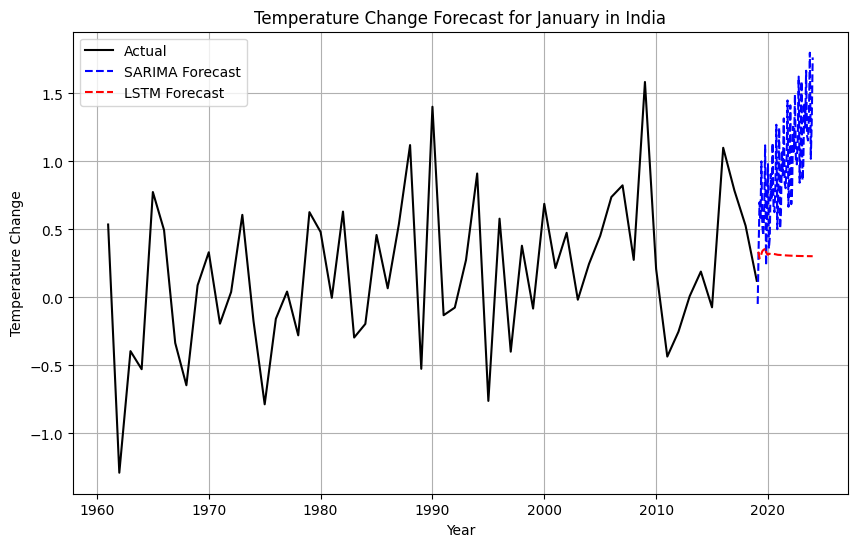

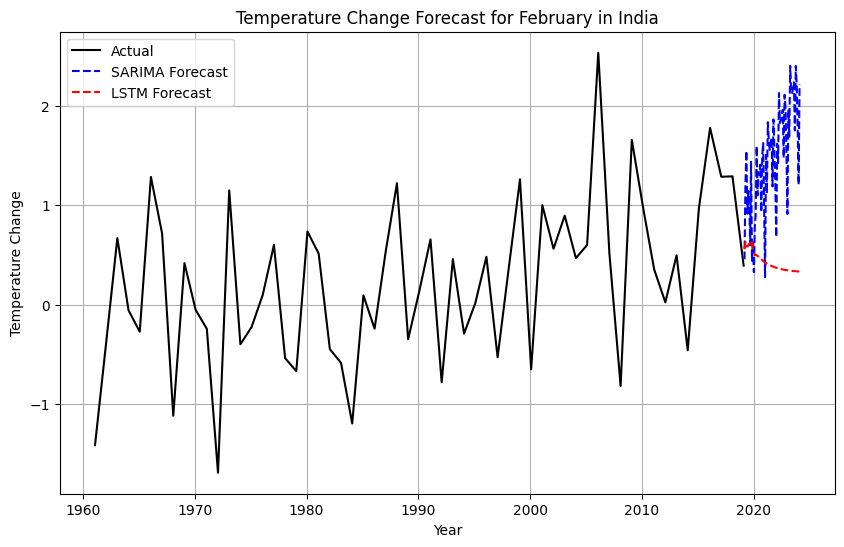

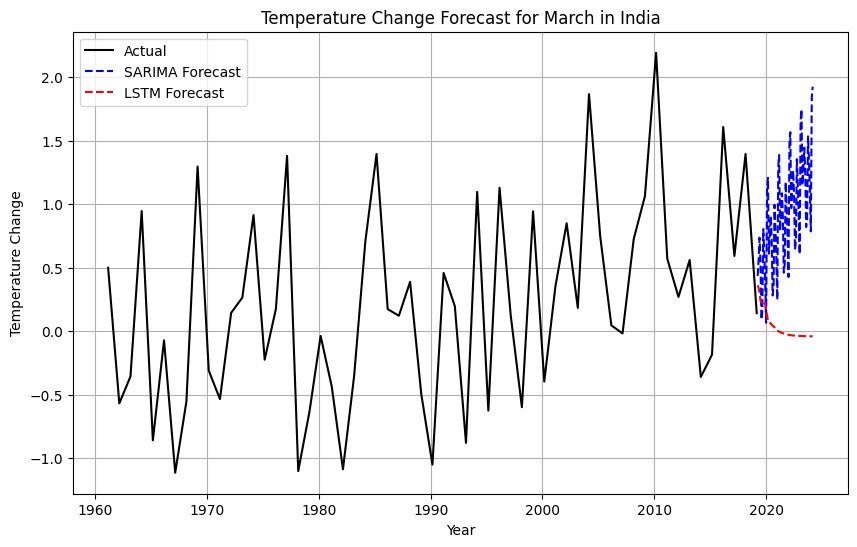

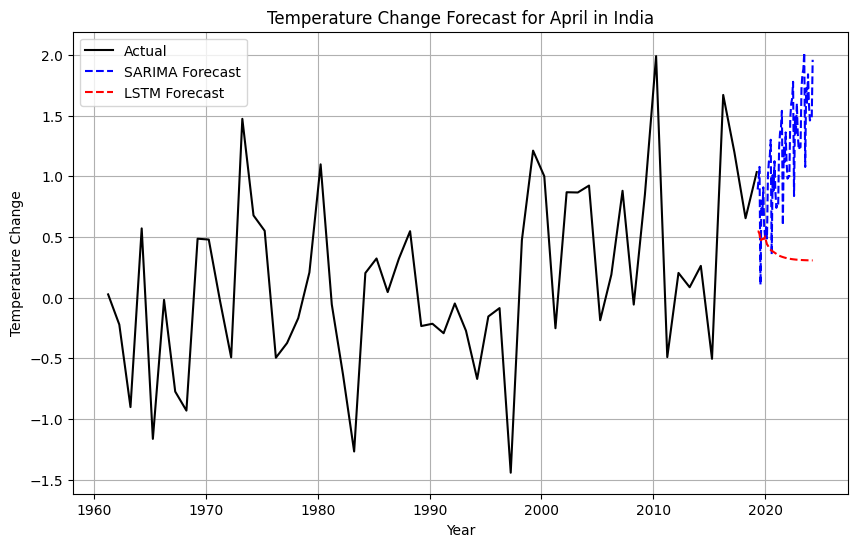

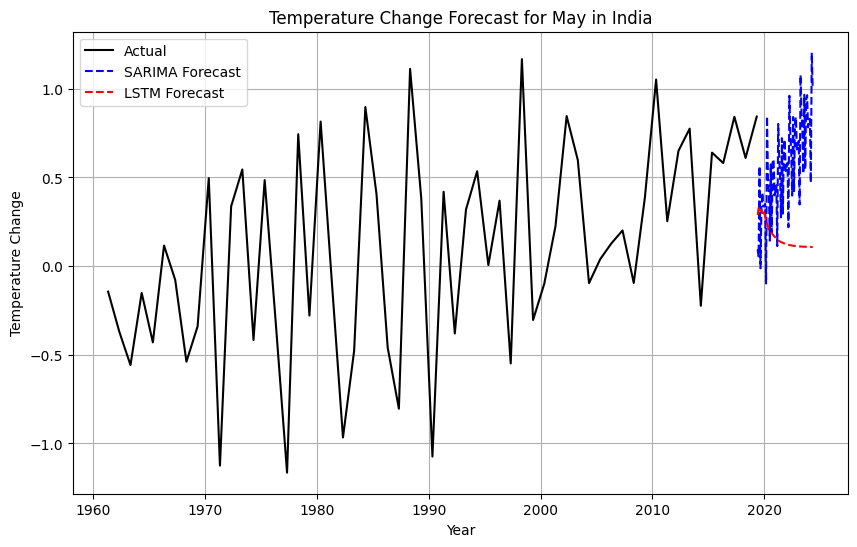

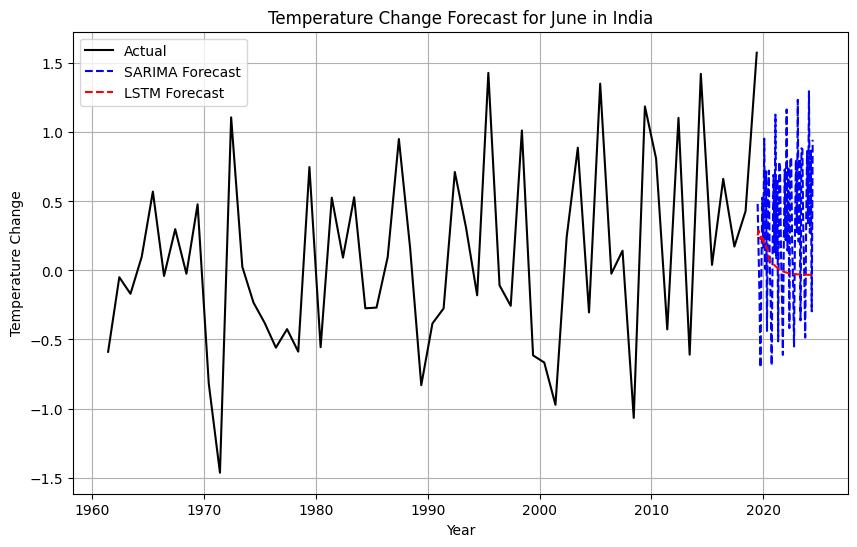

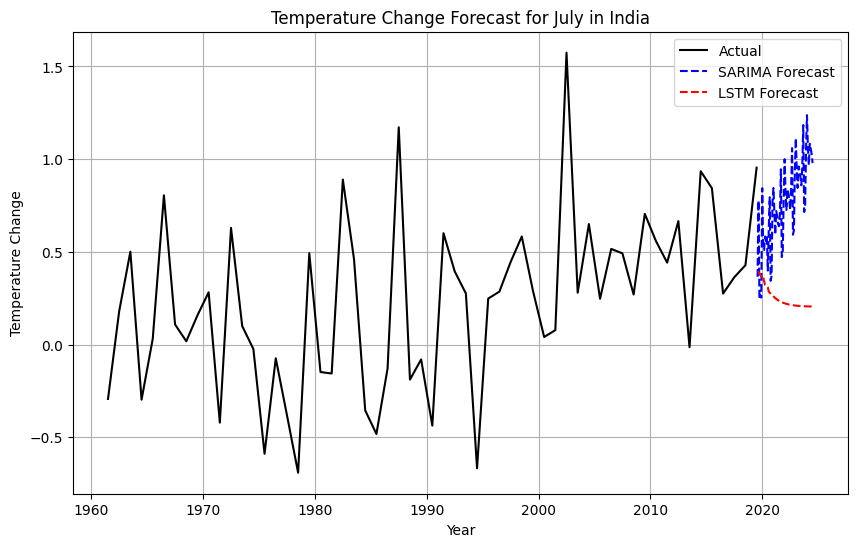

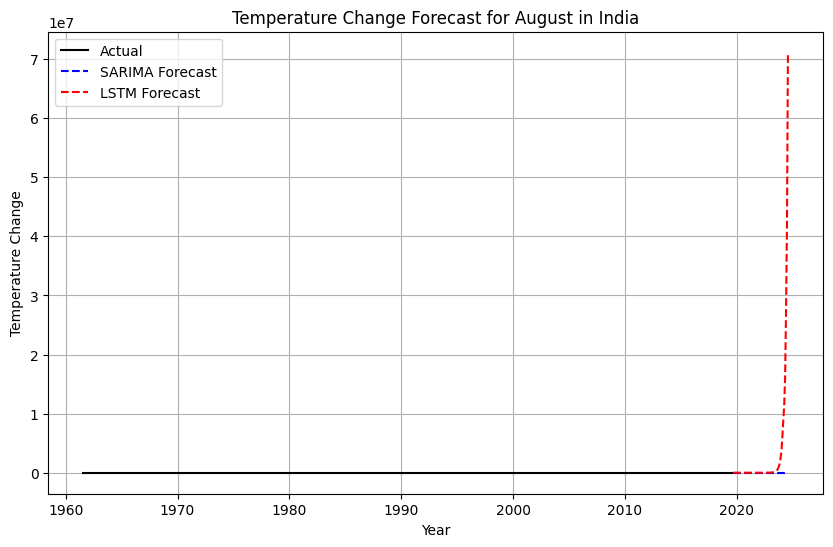

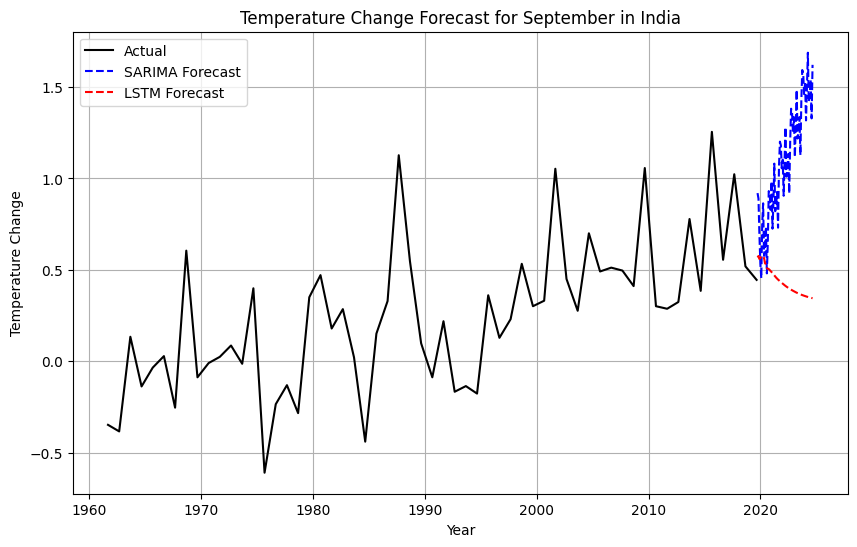

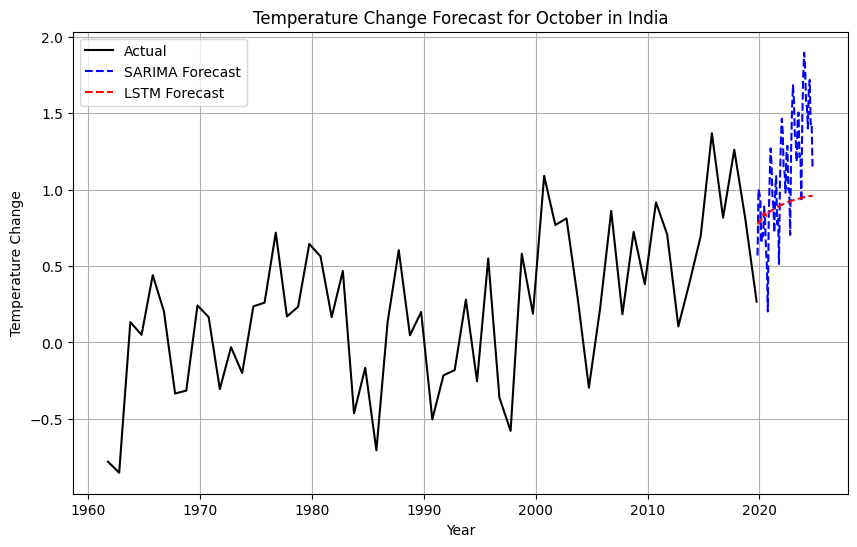

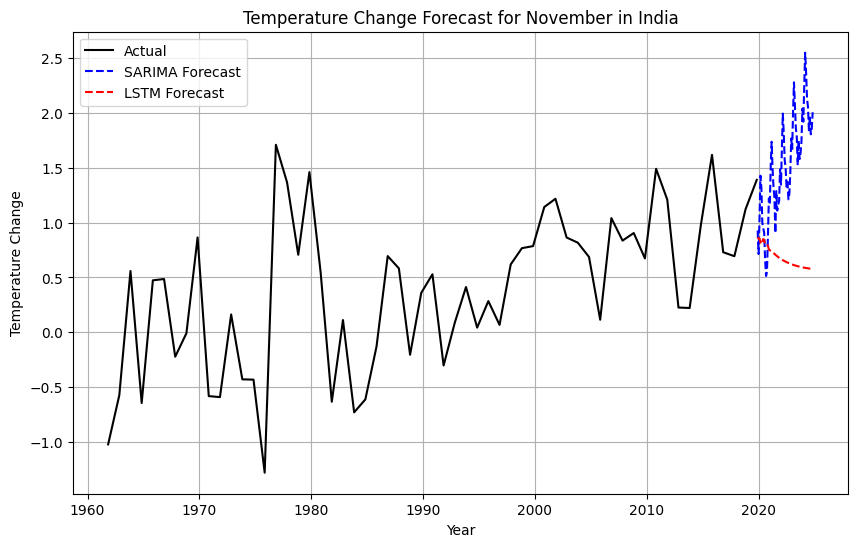

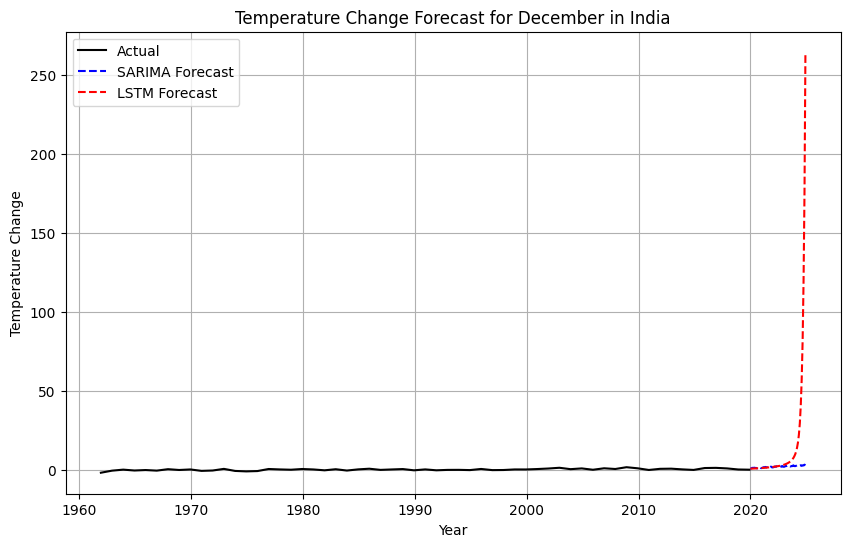

In [ ]:
# Function to plot forecast
def plot_forecast(actual, sarima_forecast, lstm_forecast, month):
    plt.figure(figsize=(10, 6))
    plt.plot(actual.index, actual.values, label='Actual', color='black')
    plt.plot(actual.index[-1] + pd.DateOffset(months=1) * np.arange(1, forecast_steps+1), sarima_forecast, label='SARIMA Forecast', linestyle='--', color='blue')
    plt.plot(actual.index[-1] + pd.DateOffset(months=1) * np.arange(1, forecast_steps+1), lstm_forecast, label='LSTM Forecast', linestyle='--', color='red')
    plt.title(f'Temperature Change Forecast for {month} in India')
    plt.xlabel('Year')
    plt.ylabel('Temperature Change')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizing forecast for each month
for month in df_final['Months'].unique():
    actual_month = df_final[df_final['Months'] == month]['Temperature']
    plot_forecast(actual_month, forecast_sarima_values[month], forecast_lstm_values[month], month)

In [ ]:

# SARIMA model evaluation
def evaluate_sarima(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# LSTM model evaluation
def evaluate_lstm(actual, forecast):
    mse = mean_squared_error(actual, forecast)
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mse, mae, rmse

# Calculate model accuracy for SARIMA
sarima_mse_list = []
sarima_mae_list = []
sarima_rmse_list = []

for month in df_final['Months'].unique():
    actual_month = test[test['Months'] == month]['Temperature']
    sarima_forecast_month = forecast_sarima_values[month][:len(actual_month)]
    mse, mae, rmse = evaluate_sarima(actual_month, sarima_forecast_month)
    sarima_mse_list.append(mse)
    sarima_mae_list.append(mae)
    sarima_rmse_list.append(rmse)

# Calculate model accuracy for LSTM
lstm_mse_list = []
lstm_mae_list = []
lstm_rmse_list = []

for month in df_final['Months'].unique():
    actual_month = test[test['Months'] == month]['Temperature']
    lstm_forecast_month = forecast_lstm_values[month][:len(actual_month)]
    mse, mae, rmse = evaluate_lstm(actual_month, lstm_forecast_month)
    lstm_mse_list.append(mse)
    lstm_mae_list.append(mae)
    lstm_rmse_list.append(rmse)

# Average the metrics over all months
avg_sarima_mse = np.mean(sarima_mse_list)
avg_sarima_mae = np.mean(sarima_mae_list)
avg_sarima_rmse = np.mean(sarima_rmse_list)

avg_lstm_mse = np.mean(lstm_mse_list)
avg_lstm_mae = np.mean(lstm_mae_list)
avg_lstm_rmse = np.mean(lstm_rmse_list)

print("SARIMA Model Accuracy:")
print("Average Mean Squared Error (MSE):", avg_sarima_mse)
print("Average Mean Absolute Error (MAE):", avg_sarima_mae)
print("Average Root Mean Squared Error (RMSE):", avg_sarima_rmse)

print("\nLSTM Model Accuracy:")
print("Average Mean Squared Error (MSE):", avg_lstm_mse)
print("Average Mean Absolute Error (MAE):", avg_lstm_mae)
print("Average Root Mean Squared Error (RMSE):", avg_lstm_rmse)


SARIMA Model Accuracy:
Average Mean Squared Error (MSE): 0.4095534181191449
Average Mean Absolute Error (MAE): 0.5039761142802849
Average Root Mean Squared Error (RMSE): 0.6085948913588303

LSTM Model Accuracy:
Average Mean Squared Error (MSE): 0.33702730410848386
Average Mean Absolute Error (MAE): 0.4598426262418429
Average Root Mean Squared Error (RMSE): 0.5526741951789425


Based on the average evaluation metrics, the **LSTM model generally outperforms the SARIMA model** in terms of accuracy for forecasting temperature changes. Here's a comparison of the average metrics:

SARIMA Model:
- Average Mean Squared Error (MSE): 0.4096
- Average Mean Absolute Error (MAE): 0.5040
- Average Root Mean Squared Error (RMSE): 0.6086

LSTM Model:
- Average Mean Squared Error (MSE): 0.3370
- Average Mean Absolute Error (MAE): 0.4598
- Average Root Mean Squared Error (RMSE): 0.5527

Lower values of MSE, MAE, and RMSE indicate better model performance, as they represent smaller errors between the forecasted values and the actual values. Therefore, since the LSTM model has lower average values for all three metrics compared to the SARIMA model, we can conclude that the LSTM model is better at forecasting temperature changes for the given dataset.
